In [1]:
%matplotlib inline
# globals
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

In [2]:
# matplotlib default customizations
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['blue','green','red',
                                           'cyan','magenta','orange','olive',
                                          'yellow', 'palegreen','black',])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [4]:
data = pd.read_csv('../processeddata/wtgcn2KO.csv')
print data

   pulselength_min  time_h cellines samplelabel  relative_puroincorporation  \
0                5       3  293T WT        Rich                    1.000000   
1                5       3  293T WT        -Leu                    0.657221   
2                5       3  293T WT        -Arg                    0.480140   
3                5       3  GCN2 KO        Rich                    1.000000   
4                5       3  GCN2 KO        -Leu                    1.065919   
5                5       3  GCN2 KO        -Arg                    0.761807   

      stdev       sem  
0  0.111472  0.064358  
1  0.061465  0.035487  
2  0.056179  0.032435  
3  0.019247  0.011112  
4  0.042756  0.024685  
5  0.017801  0.010278  


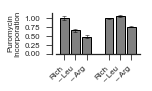

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = [0,1,2,3,4,5,]
xlocations = [0,1,2,4,5,6]
ax.bar(xlocations, data['relative_puroincorporation'][sampleOrder], align='center', facecolor = 'grey',edgecolor='black',linewidth=1 )
ax.errorbar(xlocations, data['relative_puroincorporation'][sampleOrder], 
            data['sem'][sampleOrder], linestyle='None', color = 'black', elinewidth=0.5, capsize=2, capthick=0.5 )

spineOffset = {'left': 4, 'bottom': 0}   
[ spine.set_position(('outward',spineOffset[loc])) 
     if loc in ['left','bottom'] else spine.set_color('none') 
     for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xticks(xlocations)
xticklabels= data['samplelabel'][sampleOrder].apply(lambda x: x.replace('-',u'– ')).apply(lambda x: x.replace('Rich ',''))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

ax.set_ylabel( 'Puromycin\nIncorporation')

fig.set_size_inches([1.5,.75])

fig.savefig('../figures/wtgcn2korichleuarg_forpaper.pdf',bbox_inches='tight')
fig.savefig('../figures/wtgcn2korichleuarg_forpaper.svg')